In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

https://www.kaggle.com/imdevskp/corona-virus-report#covid_19_clean_complete.csv

In [2]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='notebook', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

Each row of the dataset contains the number of confirmed, Deaths and Recovered cases for each Providence/State for each day since 22/01/2010

In [3]:
data = pd.read_csv(r"C:\Users\loren\OneDrive\Documentos\CURSO PYTHON\MACHINE LEARNING\CORONAVIRUS\covid_19_clean_complete.csv")
data.head()
print(data.shape)

(20619, 8)


In [4]:
data.rename(columns = {"Province/State" : "Province_State", 
                       "Country/Region": "Country_Region"}, inplace = True)
data.columns

Index(['Province_State', 'Country_Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [5]:
data.groupby(["Country_Region"])["Confirmed"].max().sort_values(ascending = False)

Country_Region
US                       461437
Spain                    153222
Italy                    143626
Germany                  118181
France                   117749
                          ...  
Sao Tome and Principe         4
Burundi                       3
South Sudan                   3
Papua New Guinea              2
Timor-Leste                   1
Name: Confirmed, Length: 184, dtype: int64

In [6]:
data["cases date"] = pd.to_datetime(data["Date"])
data.dtypes

Province_State            object
Country_Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Deaths                   float64
Recovered                  int64
cases date        datetime64[ns]
dtype: object

## Prediction

In [8]:
data2 = data
timeseries = data.set_index("cases date")
data2['date_days'] = (data["cases date"] - data["cases date"].min())  / np.timedelta64(1,'D')

In [9]:
data3 = timeseries.groupby(["cases date"]).sum()
data3.index = (data3.index - data3.index.min()) / np.timedelta64(1,'D')
data3 = data3.drop(["date_days"], axis = 1)
data3

,Lat,Long,Confirmed,Deaths,Recovered
cases date,,,,,
0.0,5600.04289,5872.157373,555,17.0,28
1.0,5600.04289,5872.157373,654,18.0,30
2.0,5600.04289,5872.157373,941,26.0,36
3.0,5600.04289,5872.157373,1434,42.0,39
4.0,5600.04289,5872.157373,2118,56.0,52
...,...,...,...,...,...
74.0,5600.04289,5872.157373,1272113,69373.0,256997
75.0,5600.04289,5872.157373,1345099,74564.0,273256
76.0,5600.04289,5872.157373,1426094,81864.0,296259


In [ ]:
# I'm going to try to create a neural network to predict when the covid outbreak will stop

In [10]:
data3["Confirmed_increase"] = 0
for i in range(len(data3)):
    data3["Confirmed_increase"].iloc[0] = 0
    data3["Confirmed_increase"].iloc[i] = data3["Confirmed"].iloc[i] - data3["Confirmed"].iloc[i-1]
data3

C:\Users\loren\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Lat,Long,Confirmed,Deaths,Recovered,Confirmed_increase
cases date,,,,,,
0.0,5600.04289,5872.157373,555,17.0,28,0
1.0,5600.04289,5872.157373,654,18.0,30,99
2.0,5600.04289,5872.157373,941,26.0,36,287
3.0,5600.04289,5872.157373,1434,42.0,39,493
4.0,5600.04289,5872.157373,2118,56.0,52,684
...,...,...,...,...,...,...
74.0,5600.04289,5872.157373,1272113,69373.0,256997,74707
75.0,5600.04289,5872.157373,1345099,74564.0,273256,72986
76.0,5600.04289,5872.157373,1426094,81864.0,296259,80995


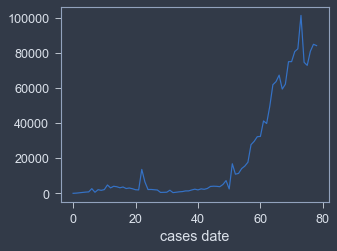

In [11]:
data3["Confirmed_increase"].plot()

In [40]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

train = data3[["Confirmed_increase"]]
train["Confirmed_increase_1"] = train["Confirmed_increase"].shift(1)
X = train["Confirmed_increase"]
y = train["Confirmed_increase_1"]

C:\Users\loren\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

In [68]:
X_test.shape

(16,)

In [69]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(200, activation = "relu", kernel_initializer = "normal", input_shape =(1,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(400, activation = "relu", kernel_initializer = "normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4, activation = "relu", kernel_initializer = "normal"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation = "linear", kernel_initializer = "normal"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 200)               400       
_________________________________________________________________
dropout_15 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 400)               80400     
_________________________________________________________________
dropout_16 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 1604      
_________________________________________________________________
dropout_17 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)               

In [70]:
model.compile(optimizer = "adam", loss = "mean_absolute_error", metrics = ["mean_absolute_error"])

In [71]:
model.fit(X_train, y_train, batch_size= 20, epochs=100, verbose = 0)

In [72]:
eval_model = model.evaluate(X_test, y_test)
print(eval_model)

16/16 [==============================] - 0s 4ms/sample - loss: 8838.3359 - mean_absolute_error: 8838.3359
[8838.3359375, 8838.336]


In [ ]:
#https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

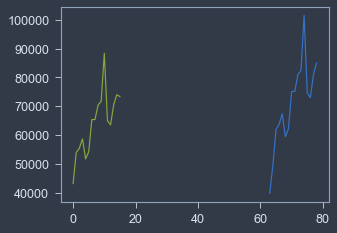

In [74]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)

array([[43185.58 ],
       [53919.094],
       [55452.934],
       [58675.6  ],
       [51750.61 ],
       [54189.816],
       [65375.105],
       [65392.54 ],
       [70390.164],
       [71776.02 ],
       [88350.695],
       [65034.73 ],
       [63536.57 ],
       [70508.56 ],
       [74001.94 ],
       [73338.62 ]], dtype=float32)